## QASM

[OpenQASM3](https://medium.com/qiskit/a-new-openqasm-for-a-new-era-of-dynamic-circuits-87f031cac49) is a new iteration of quantum assembler language, addresses problems of:
- dynamic circuits (those which can have classic control, not pure quantum)
- adding pulses (low level interactions), not only gates.
- time aware (decoherence time).


In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1, 0)
qc.measure_all()
code = qc.qasm()

with open('bell.qasm', 'w') as f:
    f.write(code)

# These are parser utilities
from qiskit.qasm import Qasm
qasm_obj = Qasm('bell.qasm')
prog = qasm_obj.parse()
tokens = qasm_obj.generate_tokens()

# this is usage
print(QuantumCircuit.from_qasm_file('bell.qasm').draw())
print(QuantumCircuit.from_qasm_str(code).draw())

             ┌───┐ ░ ┌─┐   
   q_0: ─────┤ X ├─░─┤M├───
        ┌───┐└─┬─┘ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░──╫─┤M├
        └───┘      ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
             ┌───┐ ░ ┌─┐   
   q_0: ─────┤ X ├─░─┤M├───
        ┌───┐└─┬─┘ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░──╫─┤M├
        └───┘      ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


# Barriers

Visual barriers, not considered in computations.

In [94]:
qr = QuantumRegister(5, name="q")
qc = QuantumCircuit(qr)
qc.x(0)

# full barrier
qc.barrier()
qc.x(1)

# 1-qubit
qc.barrier(1)
qc.x(2)
qc.h(2)

# multi-qubit
qc.barrier(2, 4)
qc.x(4)
b = qc.barrier([1, 2, 4])
qc.z(3)

# works with qubit objects also
qc.barrier(qr[2:4])
qc.draw()

┌───┐ ░                         
q_0: ┤ X ├─░─────────────────────────
     └───┘ ░ ┌───┐  ░           ░    
q_1: ──────░─┤ X ├──░───────────░────
           ░ ├───┤┌───┐ ░       ░  ░ 
q_2: ──────░─┤ X ├┤ H ├─░───────░──░─
           ░ ├───┤└───┘ ░       ░  ░ 
q_3: ──────░─┤ Z ├─────────────────░─
           ░ └───┘      ░ ┌───┐ ░  ░ 
q_4: ──────░────────────░─┤ X ├─░────
           ░            ░ └───┘ ░

# Operators

[source](https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html).

The Operator class is used in Qiskit to represent matrix operators acting on a quantum system. It has several methods to build composite operators using tensor products of smaller operators, and to compose operators.

Operators can be non-square.

In [95]:
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.extensions import RXGate, XGate, CXGate

XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
print(XX.dim)
print(XX.data)

print('Input dimensions:', XX.input_dims())
print('Output dimensions:', XX.output_dims())

(4, 4)
[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]
Input dimensions: (2, 2)
Output dimensions: (2, 2)


Create an Operator from a Pauli object, Gate, and a Circuit.

In [96]:
print(Operator(Pauli('ZY')))
print()

qc = QuantumCircuit(2)
qc.z(1)
qc.y(0)
print(Operator(qc))
print()

print(Operator(CXGate()))

Operator([[0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j],
          [0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

Operator([[0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j],
          [0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [97]:
Operator(CXGate())

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

Unitary check

In [98]:
print(Operator(CXGate()).is_unitary())

print(Operator([[0, 1], [1, 1]]).is_unitary())

True
False


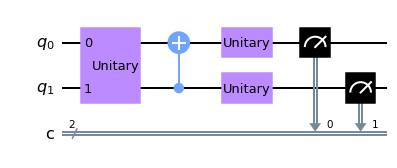

In [105]:
# Create an operator
XX = Operator(Pauli(label='XX'))

# Add to a circuit
circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.cx(1, 0)
circ.append(Operator([[1j, 0.], [0., -1j]]), [1])


import scipy

# some Hermitian
H = np.array([[1, -1/3], [-1/3, 1]])

# Get it's Unitary
U = scipy.linalg.expm(1j * H)
circ.append(Operator(U), [0])

circ.measure([0,1], [0,1])
circ.draw('mpl')

If Operator is Unitary, life is easier!

In [107]:
from qiskit.compiler import transpile
from qiskit import BasicAer

backend = BasicAer.get_backend('qasm_simulator')
circ = transpile(circ, backend, basis_gates=['u1','u2','u3','cx'])
circ.draw()

global phase: 2.5708
     ┌────────────────┐┌───┐┌──────────────────────┐┌─┐   
q_0: ┤ U3(π,-π/2,π/2) ├┤ X ├┤ U3(0.66667,-π/2,π/2) ├┤M├───
     ├────────────────┤└─┬─┘└──────┬────────┬──────┘└╥┘┌─┐
q_1: ┤ U3(π,π/2,-π/2) ├──■─────────┤ U1(-π) ├────────╫─┤M├
     └────────────────┘            └────────┘        ║ └╥┘
c: 2/════════════════════════════════════════════════╩══╩═
                                                     0  1

Tensoring, composition, and linear combination

In [108]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))

AB = A.expand(B)
import numpy as np

np.allclose(AB.data, Operator(Pauli('ZX')).data)

print(A.compose(B))
print()
print(A + 3 * B)

Operator([[ 0.+0.j,  1.+0.j],
          [-1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Operator([[ 3.+0.j,  1.+0.j],
          [ 1.+0.j, -3.+0.j]],
         input_dims=(2,), output_dims=(2,))


# Fidelity
of channels (transformations) and states.

We may also compare operators using the `process_fidelity` function from the Quantum Information module. This is an information theoretic quantity for how close two quantum channels are to each other, and in the case of unitary operators it does not depend on global phase.

In [122]:
from qiskit.quantum_info import process_fidelity

# Two operators which differ only by phase
op_a = Operator(XGate())
op_b = np.exp(1j * 0.5) * Operator(XGate())

# Compute process fidelity
F = process_fidelity(op_a, op_b)
print('Process fidelity =', F)

Process fidelity = 1.0


In quantum mechanics, notably in quantum information theory, **fidelity is a measure of the "closeness" of two quantum states**. It expresses the probability that one state will pass a test to identify as the other.

For 2 density matrices, fidelity is defined as ${\displaystyle F(\rho ,\sigma )=\left(\operatorname {tr} {\sqrt {{\sqrt {\rho }}\sigma {\sqrt {\rho }}}}\right)^{2}}$.

If one of the states is a pure state this simplifies to $F(\rho_1, \rho_2) = \langle\psi_1|\rho_2|\psi_1\rangle$ where $\rho_1 = |\psi_1\rangle\!\langle\psi_1|$.

To measure fidelity of 2 quantum states we use [qiskit.quantum_info.state_fidelity](https://qiskit.org/documentation/stubs/qiskit.quantum_info.state_fidelity.html#qiskit.quantum_info.state_fidelity).

**F(ρ,σ) = 1 if and only if ρ = σ, since Ψρ = Ψσ implies ρ = σ.** Thus, state vectors should be equal up to global phase.

In [121]:
from qiskit.quantum_info import state_fidelity, process_fidelity, Statevector

qc = QuantumCircuit(2)
qc.x(1)
qc.z(1)
backend = BasicAer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
state = result.get_statevector(qc)

# up to phase
print(state_fidelity(Statevector([0, 0, -1, 0]), state))
print(state_fidelity(Statevector([0, 0, 1, 0]), state))

print(state_fidelity(Statevector([0, 0, 0.8, 0.6]), state))

# orthogonal
print(state_fidelity(Statevector([0, 1, 0, 0]), state))

1.0
1.0
0.6400000000000001
0.0


# Aer, BasicAer, and simulators

[`BasicAer`](https://qiskit.org/documentation/apidoc/providers_basicaer.html) - A module of Python-based quantum simulators. Simulators are accessed via the BasicAer provider. Holds:
- `QasmSimulatorPy([configuration, provider])` - Python implementation of a qasm simulator.
- `StatevectorSimulatorPy([configuration, provider])` - Python statevector simulator.
- `UnitarySimulatorPy([configuration, provider])` - Python implementation of a unitary simulator.

--- 

[`Aer`](https://qiskit.org/documentation/apidoc/aer_provider.html). Holds:

**Simulator Backends**:
- `AerSimulator([configuration, properties, …])` - Noisy quantum circuit simulator backend.
- `PulseSimulator([configuration, properties, …])` - Pulse schedule simulator backend.
**Legacy Simulator Backends**
- `QasmSimulator([configuration, properties, …])` - Noisy quantum circuit simulator backend.
- `StatevectorSimulator([configuration, …])` - Ideal quantum circuit statevector simulator
- `UnitarySimulator([configuration, …])` - Ideal quantum circuit unitary simulator.


In [137]:
from qiskit import Aer, BasicAer

print(Aer.get_backend('aer_simulator').__repr__())
print(BasicAer.get_backend('qasm_simulator').__repr__())
print(Aer.get_backend('qasm_simulator').__repr__())  # legacy

AerSimulator('aer_simulator')
<QasmSimulatorPy('qasm_simulator')>
QasmSimulator('qasm_simulator')


In [157]:
qc = QuantumCircuit(2)
qc.x(0)
from qiskit import execute

# statevector
essense = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
print(np.round_(essense, 4))

print()

# unitary
essense = BasicAer.get_backend('unitary_simulator').run(qc).result().get_unitary()
print(essense)
print()

# qasm
qc.measure_all()
essense = execute(qc, BasicAer.get_backend('qasm_simulator'), shots=10).result().get_counts()
print(essense)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]

{'01': 10}


# IBMQ Backends

![](https://miro.medium.com/max/700/1*YuR-BtRRTxLQ5EXW8fbUEQ.png)

`Provider` - IBM Quantum Experience account provider. A server to ask about machines.

`Backend` - IBM Quantum Experience device. Quantum computer.

In [178]:
from qiskit import IBMQ

# IBMQ.save_account(TOKEN)
IBMQ.load_account()
print(list(IBMQ.providers()))

provider = IBMQ.get_provider('ibm-q')
lima = provider.get_backend("ibmq_lima")

nq = lima.configuration().n_qubits
my_limit = lima.job_limit()

status = lima.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs

print(f"Works = {is_operational}, Queue = {jobs_in_queue}, My Job Limit = {my_limit}, Qubits = {nq}")

ibmqfactory.load_account:WARNING:2021-11-23 15:50:11,256: Credentials are already in use. The existing account in the session will be replaced.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]
Works = True, Queue = 10, My Job Limit = <qiskit.providers.ibmq.backendjoblimit.BackendJobLimit object at 0x000002776F6F5880>, Qubits = 5


### Execution - syncronous

In [181]:
import time

##################################
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
##################################

##### TRANSPILE FOR BACKEND ######
qc = transpile(qc, lima)
print(qc.draw())


job = lima.run(qc)
start_time = time.time()
job_status = job.status()

from qiskit.tools.monitor import job_monitor
from time import time

start = time()
job_monitor(job)
end = time()

print(job.status(), job.result().get_counts())

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐      ░ ┌─┐   
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───░─┤M├───
               └─────────┘└────┘└─────────┘┌─┴─┐ ░ └╥┘┌─┐
      q_1 -> 1 ────────────────────────────┤ X ├─░──╫─┤M├
                                           └───┘ ░  ║ └╥┘
ancilla_0 -> 2 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_1 -> 3 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_2 -> 4 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
       meas: 2/═════════════════════════════════════╩══╩═
                                                    0  1 
Job Status: job has successfully run
JobStatus.DONE {'00': 489, '01': 57, '10': 17, '11': 461}


# Coupling Map

[Limitation, which shows allowed `CNOT` interactions between qubits](https://qiskit.org/documentation/stubs/qiskit.transpiler.CouplingMap.html).

In [ ]:
!pip install networkx

[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]


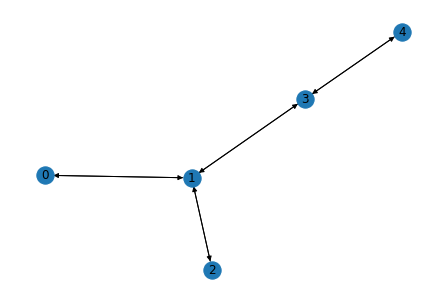

In [171]:
backend = provider.get_backend("ibmq_lima")
coupling_map = backend.configuration().coupling_map
print(coupling_map)

import networkx as nx
G = nx.DiGraph()
G.add_edges_from(coupling_map)
pos = nx.draw(G, with_labels = True)

How this affects the circuit?

In [191]:
qc = QuantumCircuit(5)
qc.cnot(0, 4)             ### DID YOU KNOW?!
qct = transpile(qc, backend)
qct.draw()

┌───┐          
q_4 -> 0 ──■──┤ X ├──■───────
         ┌─┴─┐└─┬─┘┌─┴─┐┌───┐
q_3 -> 1 ┤ X ├──■──┤ X ├┤ X ├
         └───┘     └───┘└─┬─┘
q_2 -> 2 ─────────────────┼──
              ┌───┐       │  
q_1 -> 3 ──■──┤ X ├──■────■──
         ┌─┴─┐└─┬─┘┌─┴─┐     
q_0 -> 4 ┤ X ├──■──┤ X ├─────
         └───┘     └───┘

Emulate on simulator

In [189]:
simulator = BasicAer.get_backend('qasm_simulator')
cm = [[1, 0], [2, 1], [3, 2], [4, 3]]
qcq = transpile(qc, simulator, coupling_map=cm)
print(qcq.draw())

# shorter
job = execute(qc, backend=simulator, shots=10, coupling_map=cm)
job.result().get_counts()

                     ┌───┐┌──────────┐ ░ ┌─┐   
q_0 -> 0 ────────────┤ X ├┤ U2(0,-π) ├─░─┤M├───
         ┌──────────┐└─┬─┘├──────────┤ ░ └╥┘┌─┐
q_1 -> 1 ┤ U2(0,-π) ├──■──┤ U2(0,-π) ├─░──╫─┤M├
         └──────────┘     └──────────┘ ░  ║ └╥┘
q_2 -> 2 ─────────────────────────────────╫──╫─
                                          ║  ║ 
q_3 -> 3 ─────────────────────────────────╫──╫─
                                          ║  ║ 
q_4 -> 4 ─────────────────────────────────╫──╫─
                                          ║  ║ 
 meas: 2/═════════════════════════════════╩══╩═
                                          0  1 


{'11': 4, '00': 6}

# Some other gates

$T^\dagger$ = `tdg()` - https://qiskit.org/documentation/stubs/qiskit.circuit.library.TdgGate.html (rotation $e^{-i\pi/4}$).

$CCCCCCX$ = Multi-Control X = `mct(control[], target)` - https://qiskit.org/documentation/stubs/qiskit.circuit.library.MCXGate.html#qiskit.circuit.library.MCXGate